# Exercise 1: Logistic Regression

## Plan

1. Review linear regression in scikit-learn
2. Try to use linear regression for classification
3. Using logistic regression for classification in scikit-learn
4. Demonstrate use of logistic regression to predict survival of Titanic passengers !

## Part 1: Review of linear regression

In this exercise, we consider the glass identification dataset ([description](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/glass.names) , [data](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/glass.data)).

In [2]:
# importing glass identification dataset using pandas
import pandas as pd
colnames=['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass=pd.read_csv('./glass.data',names=colnames,index_col='id')
glass.sort_values('al',inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


Suppose we want to predict ri, refractory index, and our only feature is al, aluminium. We can do it using linear regression. First we plot the data (ri against al) using Pandas scatter plot.

In [5]:
import matplotlib.pyplot as plt
# scatter plot using Pandas
glass.plot(kind='scatter',x='al',y='ri')
%matplotlib inline
plt.show() # ？无法显示

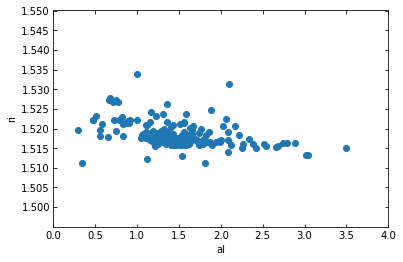

In [12]:
import numpy as np
x=glass.al
y=glass.ri
plt.scatter(x,y)
plt.xlabel('al')
plt.ylabel('ri')
plt.xticks(np.arange(0,4.5,0.5))
plt.yticks(np.arange(1.500,1.550,0.005))
plt.tick_params(top='on',right='on',direction='in')
plt.show()

Then we fit a linear regression model to our data.

In [14]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
X=glass[['al']]
y=glass['ri']
reg=LinearRegression().fit(X,y)
# make predictions for all values of X
glass['ri_pred']=reg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


We plot the prediction line with respect to all other data.

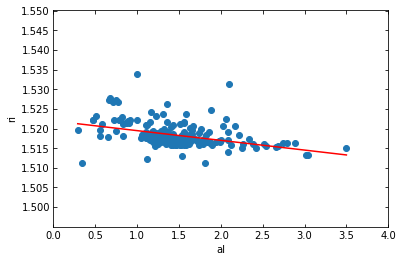

In [16]:
# put the plots together
plt.scatter(glass.al,glass.ri)
plt.plot(glass.al,glass.ri_pred,'r')
plt.xlabel('al')
plt.ylabel('ri')
plt.xticks(np.arange(0,4.5,0.5))
plt.yticks(np.arange(1.500,1.550,0.005))
plt.tick_params(top='on',right='on',direction='in')
plt.show()

Remember that linear regression equation has the following form: $$y=\beta_0+\beta_1x$$

In [17]:
# compute coefficient
reg.coef_

array([-0.00247761])

In [18]:
# compute intercept
reg.intercept_

1.5219453302386425

In [22]:
# compute prediction for al=4 
reg.predict(np.array([4]).reshape(-1,1))

array([1.5120349])

## Part 2: Predicting a categorial response using linear regression

We define a binary categorial response to predict. 

In [24]:
# examine glass_type
glass['glass_type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [30]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household']=glass['glass_type'].map({1:0,2:0,3:0,5:1,6:1,7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're predicting **household** using **al**. Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'household')

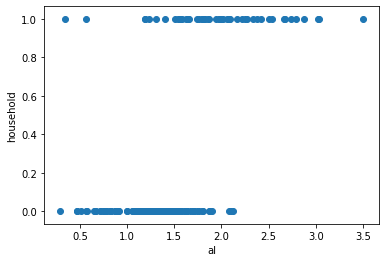

In [31]:
plt.scatter(glass.al,glass.household)
plt.xlabel('al')
plt.ylabel('household')

Let's draw a regression line, like we did before:

In [33]:
# fit a linear regression model and store the predictions
X=glass[['al']]
y=glass['household']
reg.fit(X,y)
glass['household_pred']=reg.predict(X)

Text(0, 0.5, 'household')

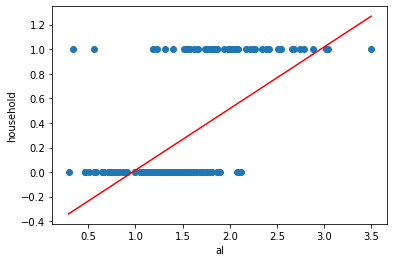

In [34]:
# scatter plot that includes the regression line
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred,'r')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [35]:
import numpy as np
# transform household_pred to 1 or 0
glass['household_pred_class']=np.where(glass['household_pred']>=0.5,1,0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0, 0.5, 'household')

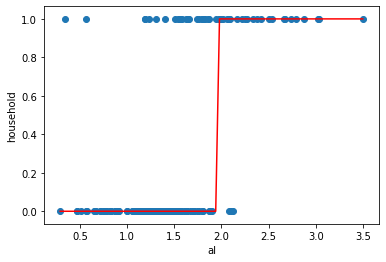

In [36]:
# plot the class predictions
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred_class,'r')
plt.xlabel('al')
plt.ylabel('household')

## Part 3: Using Logistic Regression Instead

Logistic regression can do just what we did:

In [38]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
X=glass[['al']]
y=glass['household']
clf=LogisticRegression().fit(X,y)
glass['household_pred_class']=clf.predict(X)

Text(0, 0.5, 'household')

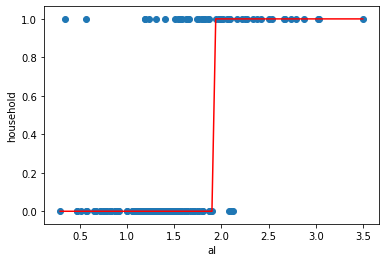

In [39]:
# plot the class predictions
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred_class,'r')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [42]:
# store the predicted probabilites of class 1
glass['household_pred_proba']=clf.predict_proba(X)[:,1] # type(clf.predict_proba(X))=array

Text(0, 0.5, 'household')

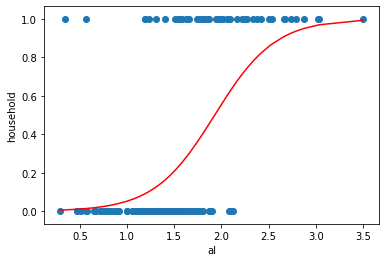

In [43]:
# plot the predicted probabilities
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred_proba,'r')
plt.xlabel('al')
plt.ylabel('household')

In [47]:
# examine some example predictions
print(clf.predict_proba(np.array([1]).reshape(-1,1)))
print(clf.predict_proba(np.array([2]).reshape(-1,1)))
print(clf.predict_proba(np.array([3]).reshape(-1,1)))

[[0.94755733 0.05244267]]
[[0.4449707 0.5550293]]
[[0.03435025 0.96564975]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

### Interpreting Logistic Regression Coefficients

Remember that the probabilities returned by logistic function for class prediction are as follows:
$$p=\frac{e^{\beta_0+\beta_1x}}{1+e^{\beta_0+\beta_1x}}$$

In [20]:
# examine the coefficient for al


[('al', 4.1804038614510901)]

In [77]:
zipped=zip(['al'],clf.coef_[0])
list(zipped)

[('al', 3.200091917981355)]

**Interpretation**: A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household' (log-odds of A is $log(\frac{P(A)}{1-P(A)})$).

In [21]:
# examine the intercept


array([-7.71358449])

In [53]:
clf.intercept_

array([-6.00934605])

**Interpretation**: For an 'al' value of 0, the log-odds of 'household' is -7.71.

### Logistic Regression with Categorical Features

Logistic regression can still be used with **categorical features**. Let's see an example:

In [62]:
# create a categorical feature related to Barium level
glass['high_ba']=np.where(glass['ba']>=0.5,1,0)

Using seaborn visualization library to draw a logistic curve:

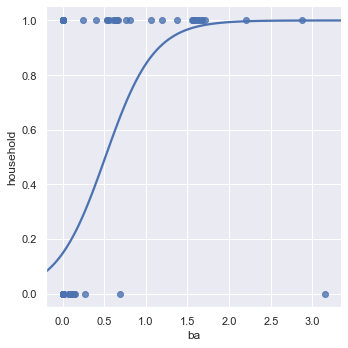

In [61]:
import seaborn as sns
sns.set(color_codes=True)
sns.lmplot(x='ba',y='household',data=glass,logistic=True,ci=None) # ci置信区间，默认ci=95

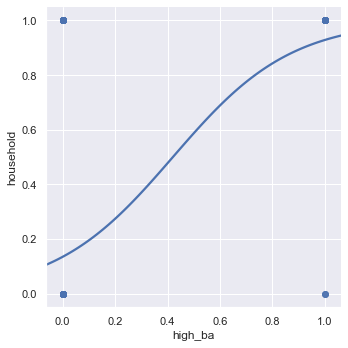

In [63]:
# categorical feature
sns.lmplot(x='high_ba',y='household',data=glass,logistic=True,ci=None)

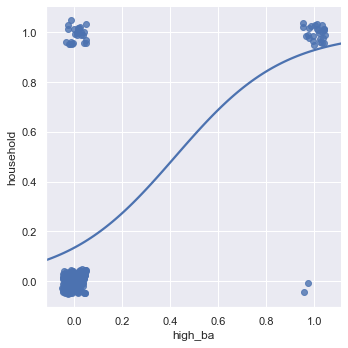

In [65]:
# categorical feature, with jitter added
sns.lmplot(x='high_ba',y='household',data=glass,logistic=True,ci=None,x_jitter=0.05,y_jitter=0.05)

In [66]:
# fit a logistic regression model
X=glass[['high_ba']]
y=glass['household']
clf.fit(X,y)

LogisticRegression()

In [27]:
# examine the coefficient for high_ba


[('high_ba', 4.4273153450187195)]

In [78]:
zipped=zip(['high_ba'],clf.coef_[0])
list(zipped)

[('high_ba', 3.200091917981355)]

**Interpretation:** Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value).

## Part 4: Logistic regression with Titanic data

**Goal**: to predict the survival of the passengers of titanic based on characteristics of passengers ([description](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/titanic.names) , [data](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/titanic.data))

### Step 1: Read the data into Pandas

In [1]:
import pandas as pd
titanic=pd.read_csv('./titanic.data',index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Define features vectors and response

In [2]:
# chosen features are passenger class and number of parents/children abroad 
features=['Pclass','Parch']
X=titanic[features]
y=titanic['Survived']

### Step 3: Split the data into training and testing sets for cross validation

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Fit a logistic regression model and obtain the coefficients

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zipped=zip(features, logreg.coef_[0])
list(zipped)

[('Pclass', -0.88190419239277), ('Parch', 0.3424041361658124)]

### Step 5: Make predictions on the testing set and calculate its accuracy

In [5]:
# class predictions (not predicted probabilities)
y_pred_class=logreg.predict(X_test)

In [6]:
# calculate classification accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.6681614349775785

### Step 6: Compare the test accuracy with the null accuracy

In [7]:
max(y_test.mean(),1-y_test.mean())

0.5739910313901345

### Confusion matrix of Titanic survival predictions

In [82]:
# print confusion matrix
metrics.confusion_matrix(y_test,y_pred_class)

array([[105,  23],
       [ 51,  44]], dtype=int64)

In [8]:
# save confusion matrix and slice into four pieces
con_matrix=metrics.confusion_matrix(y_test,y_pred_class)
TN=con_matrix[0][0] # C0,0 true negatives
TP=con_matrix[1][1] # C1,1 true positives
FN=con_matrix[1][0] # C1,0 false negatives
FP=con_matrix[0][1] # C0,1 false positives
# Ci,j 已知在组𝑖中，预测在组𝑗中的观察数

In [9]:
# calculate the sensitivity
print (TP / float(TP + FN))

0.4631578947368421


In [10]:
# calculate the specificity
print (TN / float(TN + FP))

0.8203125


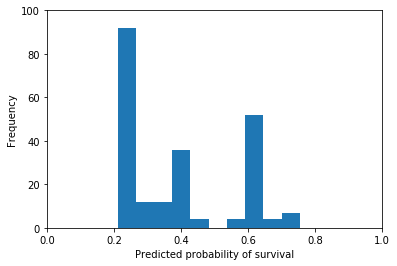

In [15]:
# store the predicted probabilities
y_pred_proba=logreg.predict_proba(X_test)[:,1]
# histogram of predicted probabilities
import matplotlib.pyplot as plt
plt.hist(y_pred_proba)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')
plt.xlim(0,1)
plt.ylim(0,100)
plt.show()

In [17]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_proba > 0.3, 1, 0)

In [19]:
# old confusion matrix
print (con_matrix)

[[105  23]
 [ 51  44]]


In [20]:
# new confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[72 56]
 [32 63]]


In [21]:
# new sensitivity (higher than before)
print (63 / float(63 + 32))

0.6631578947368421


In [22]:
# new specificity (lower than before)
print (72 / float(72 + 56))

0.5625


In [23]:
# calculate classification accuracy with new threshold
print (metrics.accuracy_score(y_test, y_pred_class))

0.6053811659192825
